# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [142]:
from sklearn import datasets
import sklearn.svm as svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, make_scorer, recall_score, precision_score
from prettytable import PrettyTable
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

from sklearn import preprocessing
  


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [53]:
data_iris = datasets.load_iris()
SVM = svm.SVC(kernel='linear')
X = data_iris["data"]
Y = data_iris["target"]

scores = cross_validate(SVM, X, Y, scoring='accuracy', cv = 10)
print(scores.keys())
print("fit_time",": ",np.mean(scores['fit_time']))
print("score_time",": ",np.mean(scores['score_time']))
print("test_score",": ",np.mean(scores['test_score']))



dict_keys(['fit_time', 'score_time', 'test_score'])
fit_time :  0.0015204906463623046
score_time :  0.0009534835815429687
test_score :  0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)
X = data_iris["data"][:,[0,2,3]]
scores = cross_validate(SVM, X, Y, scoring='accuracy', cv = 10)
print(scores.keys())
print("fit_time",": ",np.mean(scores['fit_time']))
print("score_time",": ",np.mean(scores['score_time']))
print("test_score",": ",np.mean(scores['test_score']))

[0.06806127 0.05199163 0.55705006 0.32289703]
dict_keys(['fit_time', 'score_time', 'test_score'])
fit_time :  0.0010059833526611327
score_time :  0.000681757926940918
test_score :  0.9800000000000001


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [63]:
mnist = datasets.load_digits()
X = mnist["data"]
y = mnist["target"]
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X)
clusters = kmeans.predict(X)
sse = []
scaler = StandardScaler().fit_transform(X)
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(scaler)
 sse.append(kmeans.inertia_)


In [64]:
sse

[109617.00000000015,
 100423.84303432597,
 93835.95523037438,
 89119.53604390801,
 85200.33453063252,
 81750.63880486702,
 78352.79261928733,
 74931.94548288759,
 72235.06320625162,
 69437.29782182128]

In [66]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 labels[mask] = mode(mnist.target[mask])[0]

accuraryKMeans = metrics.accuracy_score(mnist.target, labels)
precision_KMeans = precision_score(mnist.target, labels , average = 'micro')
recall_KMeans = recall_score(mnist.target, labels , average = 'micro')
f1_KMeans = f1_score(mnist.target, labels , average = 'micro')


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [74]:
def train_model(type,X, y):
  model = ''
  name = ''
  if(type == 0):
    name = "Random Forest"
    model=RandomForestClassifier(n_estimators=100)
  if(type == 1):
    name = "NB"
    model = GaussianNB()
  if(type == 2):
    name = "kNN"
    model = KNeighborsClassifier(n_neighbors=3)
 
  accuracy =cross_validate(model, X, y, scoring='accuracy', cv = 10)['test_score'].mean()
  precision =cross_validate(model, X, y, scoring=make_scorer(precision_score, average='micro'), cv = 10)['test_score'].mean()
  recall = cross_validate(model, X, y, scoring=make_scorer( recall_score, average='micro'), cv = 10)['test_score'].mean()
  f1 = cross_validate(model, X, y, scoring=make_scorer(f1_score, average='micro'), cv = 10)['test_score'].mean()
  return [name,round(accuracy,4),round(precision,4),round(recall,4),round(f1,4)]

In [84]:
mnist = datasets.load_digits()
X = mnist["data"]
y = mnist["target"]

In [75]:
t = PrettyTable(["Model","Accuracy", "Precision","Recall", "F1"])
t.add_row(train_model(0,X, y))
t.add_row(train_model(1,X, y))
t.add_row(train_model(2,X, y))
t.add_row(["KMeans",round(accuraryKMeans,4),round(precision_KMeans,4) ,round(recall_KMeans,4) ,round(f1_KMeans,4) ])


In [76]:
print(t)

+---------------+----------+-----------+--------+--------+
|     Model     | Accuracy | Precision | Recall |   F1   |
+---------------+----------+-----------+--------+--------+
| Random Forest |  0.9493  |   0.9493  | 0.9471 | 0.9471 |
|       NB      |  0.8114  |   0.8114  | 0.8114 | 0.8114 |
|      kNN      |  0.9766  |   0.9766  | 0.9766 | 0.9766 |
|     KMeans    |  0.7935  |   0.7935  | 0.7935 | 0.7935 |
+---------------+----------+-----------+--------+--------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
Với kết quả thu được từ dataset trên thì học có giám sát tốt hơn

:2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [96]:
clustering = AgglomerativeClustering(n_clusters=10)
clustering = clustering.fit_predict(X)

labels = np.zeros_like(clustering)
for i in range(10):
 mask = (clustering == i)
 labels[mask] = mode(mnist.target[mask])[0]

accuraryAgglomerativeClustering = metrics.accuracy_score(mnist.target, labels)
precision_AgglomerativeClustering = precision_score(mnist.target, labels , average = 'micro')
recall_AgglomerativeClustering = recall_score(mnist.target, labels , average = 'micro')
f1_AgglomerativeClustering = f1_score(mnist.target, labels , average = 'micro')


In [99]:
t = PrettyTable(["Model","Accuracy", "Precision","Recall", "F1"])
t.add_row(["AgglomerativeClustering",round(accuraryAgglomerativeClustering,4),round(precision_AgglomerativeClustering,4) ,round(recall_AgglomerativeClustering,4) ,round(f1_AgglomerativeClustering,4) ])
print(t)

+-------------------------+----------+-----------+--------+-------+
|          Model          | Accuracy | Precision | Recall |   F1  |
+-------------------------+----------+-----------+--------+-------+
| AgglomerativeClustering |  0.862   |   0.862   | 0.862  | 0.862 |
+-------------------------+----------+-----------+--------+-------+


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [101]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data


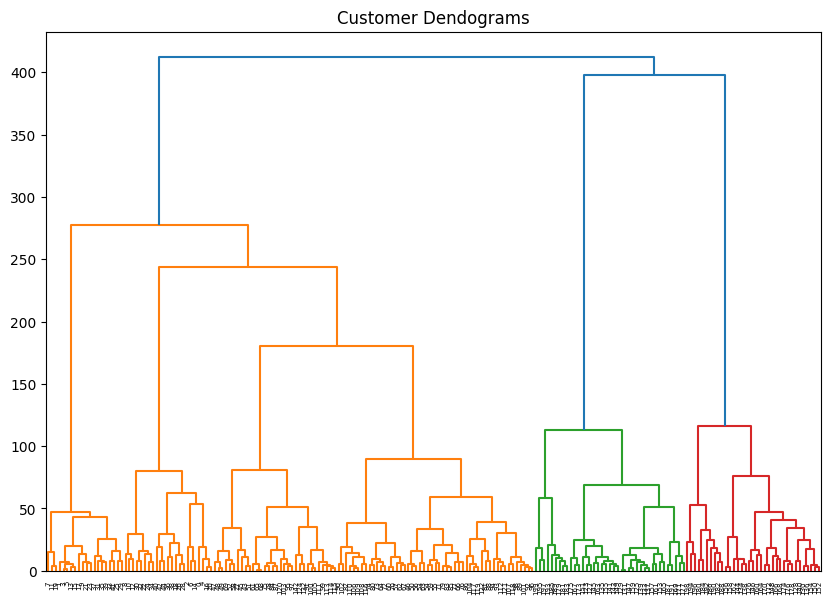

In [114]:
data=pd.read_csv('shopping-data.csv')
data.columns
X = data[[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']]
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [134]:
label_encoder = preprocessing.LabelEncoder()
data['Genre']= label_encoder.fit_transform(data['Genre'])

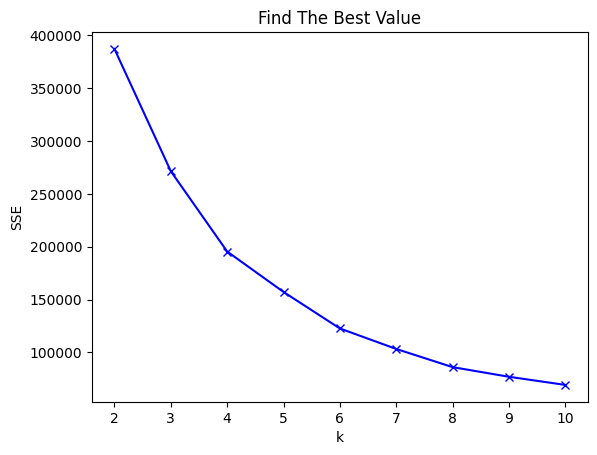

In [135]:

X = data.iloc[:,:].values
sse = []
listK = list(range(2, 11))
for k in listK:
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(X)
 sse.append(kmeans.inertia_)

plt.plot(listK, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Find The Best Value')
plt.show()

In [145]:
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)


In [146]:
silhouette_avg = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.39803968212964774


*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [154]:
optimize = set(dend['color_list'])
optimize = len(optimize) - 1
clustering = AgglomerativeClustering(n_clusters=optimize)
clustering = clustering.fit_predict(X)
clustering

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#Finally,
Save a copy in your Github. Remember renaming the notebook.